In [279]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib import dates

pd.set_option('display.max_rows', 500)

Get data saved in file structure downloaded from John Hopkins git 

In [280]:
pd_raw= pd.read_csv('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [281]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,157508,157542,157585,157858,157858,157858,157648,157660,157665,157725
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,4148,4151,4151,4159,4159,4162,4162,4177,4177,4178
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,5346242,5348123,5350867,5354440,5356885,5358455,5358455,5366522,5371341,5376642
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,341058,341468,341768,342115,342405,342538,342604,342765,342977,343157
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,2175,2179,2179,2196,2197,2200,2204,2210,2222,2242
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,83967,84384,84895,85447,85924,86453,87248,88595,90333,92532


UK mainland data is at index 270

In [282]:
pd_UK = pd_raw.loc[[270]]
pd_France = pd_raw.loc[[130]]
pd_Germany =pd_raw.loc[[134]]
pd_Italy =pd_raw.loc[[153]]

cut dataframe to data and number of covid cases

In [283]:
pd_UK1= pd_UK[pd_UK['Country/Region'] == 'United Kingdom'].iloc[:,4::]
pd_France = pd_France[pd_France['Country/Region'] == 'France'].iloc[:,4::]
pd_Germany =pd_Germany[pd_Germany['Country/Region'] == 'Germany'].iloc[:,4::]

In [284]:
pd_UK1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
270,0,0,0,0,0,0,0,0,0,2,...,10560341,10610958,10660981,10719165,10771444,10819515,10873468,10932545,11010286,11097851


transpose dates and number of covid cases into columns

In [285]:
pd_UK1 = pd_UK1.T
pd_France = pd_France.T
pd_Germany = pd_Germany.T

In [286]:
pd_UK1

,270
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
12/12/21,10819515
12/13/21,10873468
12/14/21,10932545
12/15/21,11010286


as number of cases is cumulative in the data, we take the difference to get the daily new cases 

In [287]:
pd_UK1 = pd_UK1.diff(axis=0)
pd_France = pd_France.diff(axis=0)
pd_Germany = pd_Germany.diff(axis=0)

In [288]:
pd_UK1

,270
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
12/12/21,48071.0
12/13/21,53953.0
12/14/21,59077.0
12/15/21,77741.0


rename the column heading to daily cases 

In [289]:
pd_UK1= pd_UK1.rename(columns={270: 'Daily_CasesUK'})
pd_France= pd_France.rename(columns={130: 'Daily_CasesFR'})
pd_Germany= pd_Germany.rename(columns={134: 'Daily_CasesGERM'})

In [290]:
pd_UK1

,Daily_CasesUK
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
12/12/21,48071.0
12/13/21,53953.0
12/14/21,59077.0
12/15/21,77741.0


In [291]:
pd_UK1.index.name = "date"
pd_France.index.name ="date"
pd_Germany.index.name = "date"

In [292]:
pd_UK1

,Daily_CasesUK
date,
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
12/12/21,48071.0
12/13/21,53953.0
12/14/21,59077.0


In [293]:
pd_UK1

,Daily_CasesUK
date,
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
12/12/21,48071.0
12/13/21,53953.0
12/14/21,59077.0


reset the index because matplotlib will not plot the index

In [294]:
pd_UK1 = pd_UK1.reset_index()
pd_France = pd_France.reset_index()
pd_Germany = pd_Germany.reset_index()

In [295]:
pd_UK1

,date,Daily_CasesUK
0,1/22/20,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
690,12/12/21,48071.0
691,12/13/21,53953.0
692,12/14/21,59077.0
693,12/15/21,77741.0


plot of daily UK cases 

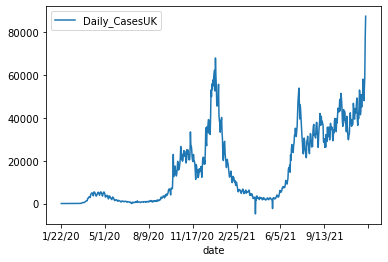

In [296]:
ax = plt.gca()
pd_UK1.plot(kind = 'line' ,x='date', y= 'Daily_CasesUK', ax=ax)

plt.show()

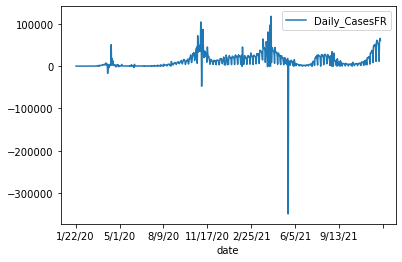

In [297]:
ax = plt.gca()
pd_France.plot(kind = 'line' ,x='date', y= 'Daily_CasesFR', ax=ax)

plt.show()


France has a negative value, Verify if that is true

In [298]:
(pd_France['Daily_CasesFR'] < 0).any().any()

True

delete rows with negative values 

In [299]:
pd_France = pd_France[pd_France.select_dtypes(include=[np.number]).ge(0).all(1)]

replotting France 

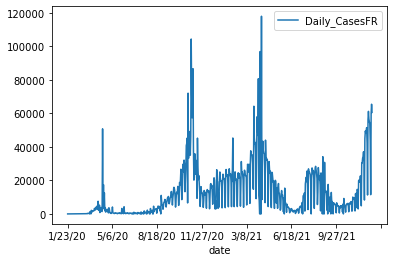

In [300]:
ax = plt.gca()
pd_France.plot(kind = 'line' ,x='date', y= 'Daily_CasesFR', ax=ax)

plt.show()

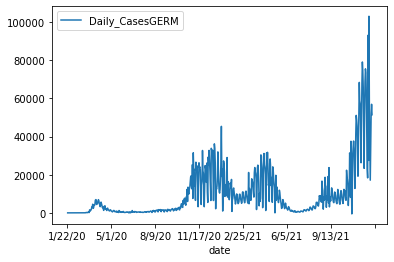

In [301]:
ax = plt.gca()
pd_Germany.plot(kind = 'line' ,x='date', y= 'Daily_CasesGERM', ax=ax)

plt.show()

Merged the three dataframes 

In [302]:
three_nations = pd.merge(pd.merge(pd_UK1,pd_France,on='date'),pd_Germany,on='date')


In [303]:
three_nations

,date,Daily_CasesUK,Daily_CasesFR,Daily_CasesGERM
0,1/23/20,0.0,0.0,0.0
1,1/24/20,0.0,2.0,0.0
2,1/25/20,0.0,1.0,0.0
3,1/26/20,0.0,0.0,0.0
4,1/27/20,0.0,0.0,1.0
...,...,...,...,...
676,12/12/21,48071.0,43848.0,17116.0
677,12/13/21,53953.0,11465.0,35423.0
678,12/14/21,59077.0,59990.0,52233.0
679,12/15/21,77741.0,65427.0,56902.0


convert date to datatime object 

In [304]:
time_idx =[datetime.strptime( each, "%m/%d/%y") for each in three_nations.date]

push the time object into the dataframe

In [305]:
three_nations['date'] =time_idx

In [306]:
three_nations

,date,Daily_CasesUK,Daily_CasesFR,Daily_CasesGERM
0,2020-01-23,0.0,0.0,0.0
1,2020-01-24,0.0,2.0,0.0
2,2020-01-25,0.0,1.0,0.0
3,2020-01-26,0.0,0.0,0.0
4,2020-01-27,0.0,0.0,1.0
...,...,...,...,...
676,2021-12-12,48071.0,43848.0,17116.0
677,2021-12-13,53953.0,11465.0,35423.0
678,2021-12-14,59077.0,59990.0,52233.0
679,2021-12-15,77741.0,65427.0,56902.0


In [348]:
three_nations.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';', index = False)

RELATIONAL DATA MODEL 

csv is not a complete data model. We need a primary key so the data is ready for big data analytics. Primary keys are not null and unique in the column. 

In [309]:
data_path=('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [310]:
pd_raw=pd.read_csv(data_path)

In [311]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157508,157542,157585,157858,157858,157858,157648,157660,157665,157725
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648


pd_data_base= pd_raw.drop(['Lat', 'Long'], axis=1)

In [313]:
pd_data_base

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,157508,157542,157585,157858,157858,157858,157648,157660,157665,157725
1,NaN,Albania,0,0,0,0,0,0,0,0,...,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549
4,NaN,Angola,0,0,0,0,0,0,0,0,...,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,4148,4151,4151,4159,4159,4162,4162,4177,4177,4178
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,5346242,5348123,5350867,5354440,5356885,5358455,5358455,5366522,5371341,5376642
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,341058,341468,341768,342115,342405,342538,342604,342765,342977,343157
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,2175,2179,2179,2196,2197,2200,2204,2210,2222,2242
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,83967,84384,84895,85447,85924,86453,87248,88595,90333,92532


create primary key 

In [319]:
test_pd= pd_data_base.set_index(['Province/State', 'Country/Region']).T

pivoting the table

In [321]:
test_pd.stack(level=[0,1])

          Province/State  Country/Region    
1/22/20   NaN             Afghanistan                 0.0
                          Albania                     0.0
                          Algeria                     0.0
                          Andorra                     0.0
                          Angola                      0.0
                                                  ...    
12/16/21  Zhejiang        Vietnam               1493237.0
                          West Bank and Gaza     465094.0
                          Yemen                   10086.0
                          Zambia                 213139.0
                          Zimbabwe               182057.0
Length: 329430, dtype: float64

In [323]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,Province/State,Country/Region,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
329425,12/16/21,Zhejiang,Vietnam,1493237.0
329426,12/16/21,Zhejiang,West Bank and Gaza,465094.0
329427,12/16/21,Zhejiang,Yemen,10086.0
329428,12/16/21,Zhejiang,Zambia,213139.0


The above can be chained into one command

In [338]:


pd_relational_model = pd_data_base.set_index(['Province/State', 'Country/Region']) \
.T \
.stack(level=[0,1]) \
.reset_index() \
.rename(columns={'level_0':'date', 
                    0:'confirmed'},  
                    )

what are the datatypes?

In [339]:
pd_relational_model.dtypes

date               object
Province/State     object
Country/Region     object
confirmed         float64
dtype: object

change data tp daterime object

In [340]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [343]:
pd_relational_model.dtypes

date              datetime64[ns]
Province/State            object
Country/Region            object
confirmed                float64
dtype: object

In [344]:
pd_relational_model

,date,Province/State,Country/Region,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,NaN,Albania,0.0
2,2020-01-22,NaN,Algeria,0.0
3,2020-01-22,NaN,Andorra,0.0
4,2020-01-22,NaN,Angola,0.0
...,...,...,...,...
329425,2021-12-16,Zhejiang,Vietnam,1493237.0
329426,2021-12-16,Zhejiang,West Bank and Gaza,465094.0
329427,2021-12-16,Zhejiang,Yemen,10086.0
329428,2021-12-16,Zhejiang,Zambia,213139.0


In [346]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep=';')